In [1]:
import pandas as pd

In [2]:
import math

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Dataset.xlsx')

In [5]:
data

,Tanggal,Curah Hujan (mm),Penjualan A (pcs),Penjualan B (pcs)
0,1,1.4,0,507
1,2,1.2,27,61
2,3,15.2,458,367
3,4,13.4,20,21
4,5,7.7,7,0
...,...,...,...,...
116,4,2.2,430,421
117,5,0.5,208,24
118,6,33.4,200,189
119,7,0.0,0,324


In [6]:
mean_A = data['Penjualan A (pcs)'].mean()

In [7]:
print("Mean of the column:", mean_A)

Mean of the column: 131.83471074380165


In [8]:
median_a =  data['Penjualan A (pcs)'].median()

In [9]:
print("median of the column:", median_a)

median of the column: 52.0


In [10]:
modus_a =  data['Penjualan A (pcs)'].mode()

In [48]:
print("modus:", modus_a)

modus: 0    0
Name: Penjualan A (pcs), dtype: int64


In [49]:
max_a = data['Penjualan A (pcs)'].max()

In [12]:
min_a = data['Penjualan A (pcs)'].min()

In [50]:
print("mm", max_a, min_a)

mm 458 0


In [13]:
range_a = data['Penjualan A (pcs)'].max() - data['Penjualan A (pcs)'].min()

In [14]:
Q1a = data['Penjualan A (pcs)'].quantile(0.25)

In [15]:
Q3a = data['Penjualan A (pcs)'].quantile(0.75)

In [16]:
IQR = Q3a - Q1a

In [17]:
print(IQR)

233.0


In [18]:
variance_a = data['Penjualan A (pcs)'].var()

In [19]:
variance_b = data['Penjualan B (pcs)'].var()

In [51]:
standar_deviasi_a = data['Penjualan A (pcs)'].std()
print("", standar_deviasi_a)

 141.59686596740283


In [21]:
standar_deviasi_b = data['Penjualan B (pcs)'].std()

In [22]:
skewness_a = data['Penjualan A (pcs)'].skew()

In [23]:
skewness_b = data['Penjualan B (pcs)'].skew()

In [24]:
kurtosis_a = data['Penjualan A (pcs)'].kurt()

In [25]:
kurtosis_b = data['Penjualan B (pcs)'].kurt()

In [26]:
print(kurtosis_b)

-0.8155134941435849


In [27]:
#Data Visualization

In [28]:
# Frequency Distribution Table (tabel penjualan A)

In [29]:
data_length_a = len(data['Penjualan A (pcs)'])

In [30]:
k_a = math.ceil(1 + 3.3 * math.log(data_length_a, 10))

In [31]:
print(k_a)

8


In [32]:
interval = math.ceil(range_a / k_a)

In [33]:
print(interval)

58


In [34]:
kelas = []

In [35]:
tepi_kelas = []

In [36]:
interval_kelas = []

In [37]:
for i in range(k_a):
    BAK = min_a + i * interval
    BBK = BAK + interval
    tepi = BAK - 0.5
    kelas.append(i + 1)
    interval_kelas.append(str(BAK) + "-" + str(BBK))
    tepi_kelas.append(tepi)
tepi_kelas.append(BBK + 0.5)
print("6. Kelas =", kelas)
print("6. Interval kelas =", interval_kelas)
print("6. Tepi kelas =", tepi_kelas)

6. Kelas = [1, 2, 3, 4, 5, 6, 7, 8]
6. Interval kelas = ['0-58', '58-116', '116-174', '174-232', '232-290', '290-348', '348-406', '406-464']
6. Tepi kelas = [-0.5, 57.5, 115.5, 173.5, 231.5, 289.5, 347.5, 405.5, 464.5]


In [38]:
# Convert data into a pandas DataFrame
df = pd.DataFrame(data, columns=["Penjualan A (pcs)"])

# Create frequency distribution using pd.cut and value_counts
df["Range"] = pd.cut(df["Penjualan A (pcs)"], bins=tepi_kelas, labels=interval_kelas, include_lowest=True)
frequency_table = df["Range"].value_counts().sort_index()
relative_frequency = frequency_table / frequency_table.sum() * 100

# Convert to DataFrame for a cleaner look
frequency_distribution = pd.DataFrame(
    {
        "Kelas": kelas,
        "Range": frequency_table.index,
        "Frequency": frequency_table.values,
        "Relative Frequency (%)": relative_frequency,
    }
)
frequency_distribution.reset_index(drop=True, inplace=True)


In [39]:
print("\nTable of Frequency Distribution")
print(frequency_distribution)


Table of Frequency Distribution
   Kelas    Range  Frequency  Relative Frequency (%)
0      1     0-58         61               50.413223
1      2   58-116          3                2.479339
2      3  116-174         10                8.264463
3      4  174-232         16               13.223140
4      5  232-290          7                5.785124
5      6  290-348          9                7.438017
6      7  348-406          8                6.611570
7      8  406-464          7                5.785124


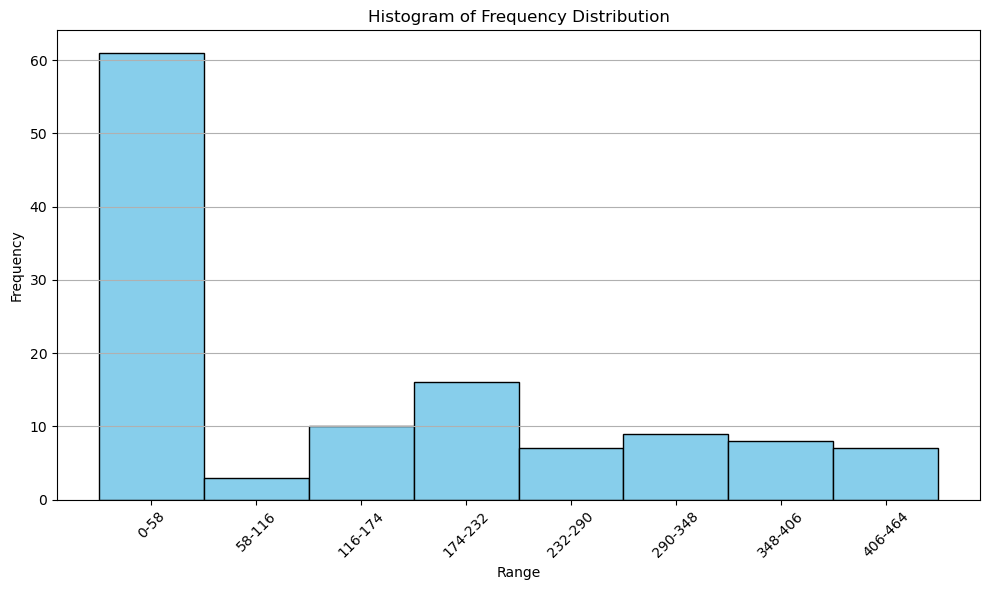

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(
    frequency_distribution["Range"],
    frequency_distribution["Frequency"],
    width=1,
    edgecolor="black",
    color="skyblue",
)

plt.title("Histogram of Frequency Distribution")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
batas_bawah = Q1a - 1.5*IQR

In [42]:
print(batas_bawah)

-344.5


In [43]:
batas_atas = Q3a + 1.5*IQR
print(batas_atas)

587.5


In [44]:
#Dengan menggunakan metode IQR, dapat kita temukan outliernya. Diketahui IQR dari data penjualan A adalah 233
#Dengan menggunakan IQR ditemukan batas bawah --344.5 dan batas atas 587.5, kita dapat menemukan outlier
#Apabila ada suatu nilai di atas batas atas dan di bawah batas bawah, berarti nilai tersebut adalah outlier
#Dari histogram di atas tidak ada data yang melebihi batas atas maupun batas bawah 
#yang mana berarti tidak ada outlier dalam data penjualan A

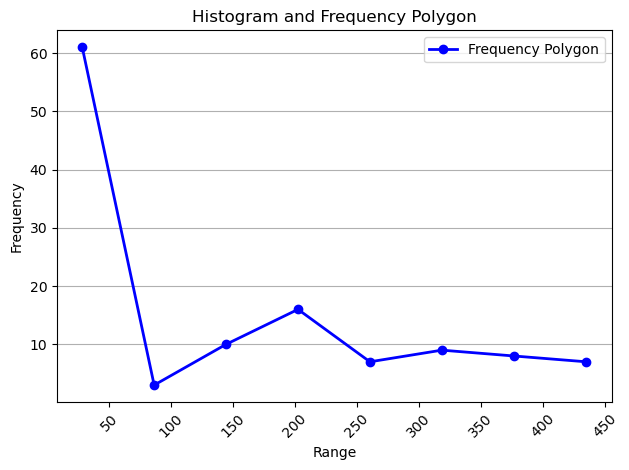

In [45]:
midpoints = [
    (tepi_kelas[i] + tepi_kelas[i + 1]) / 2 for i in range(len(tepi_kelas) - 1)
]
plt.plot(
    midpoints,
    frequency_table.values,
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
    label="Frequency Polygon",
)

# Penambahan label dan grid
plt.title("Histogram and Frequency Polygon")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()



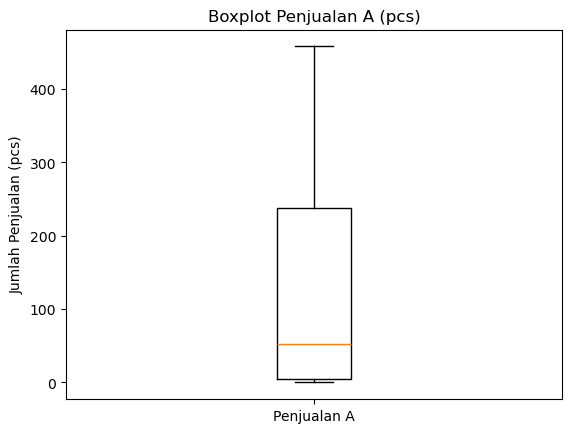

In [46]:
plt.boxplot(data['Penjualan A (pcs)'])
plt.title('Boxplot Penjualan A (pcs)')  
plt.ylabel('Jumlah Penjualan (pcs)')    
plt.xticks([1], ['Penjualan A'])
plt.show()         